In [1]:
import pandas as pd

In [4]:
df_abril = pd.read_csv('.\data_source\premium_abril.csv',sep="\t")

In [3]:
df_abril.head(5)

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,estadoMora,cantPaqRentabilidad,conVisaConMaster,conMasterConVisa,planPaqueteHist,maxPlanPaquete,minPlanPaquete,avgPlanPaquete,cantMarcaAtraso,clase_binaria
0,6685522,201604,1,0,155,71,263,775.29,0,706.45,...,0,0.001891,0.000000,0.000000,7903.18,4609.10,-829.09,1317.196667,0,NEG
1,6685723,201604,1,0,3,65,263,1325.27,0,886.06,...,0,0.000819,1.683698,0.593931,19342.41,7000.70,182.78,3223.735000,0,NEG
2,6685739,201604,1,0,733,70,234,548.66,0,502.95,...,0,0.002192,0.000000,0.000000,-10602.09,1824.08,-4418.71,-1767.015000,0,NEG
3,6685748,201604,1,0,363,54,245,1704.01,0,295.28,...,0,0.000651,0.000000,0.000000,54506.30,24572.05,-1745.25,9084.383333,0,NEG
4,6685836,201604,1,0,253,70,203,908.59,0,436.33,...,0,0.001781,0.000000,0.000000,24797.47,11962.57,481.57,4132.911667,0,NEG


In [9]:
df_abril.dtypes

numero_de_cliente                   int64
foto_mes                            int64
marketing_activo_ultimos90dias      int64
cliente_vip                         int64
cliente_sucursal                    int64
                                   ...   
maxPlanPaquete                    float64
minPlanPaquete                    float64
avgPlanPaquete                    float64
cantMarcaAtraso                     int64
clase_binaria                      object
Length: 238, dtype: object

In [5]:
from pycaret.classification import *

In [6]:
exp_class = setup(df_abril, target='clase_binaria')

Setup Succesfully Completed!


,Description,Value
0,session_id,1552
1,Target Type,Binary
2,Label Encoded,"NEG: 0, POS: 1"
3,Original Data,"(193860, 238)"
4,Missing Values,True
5,Numeric Features,180
6,Categorical Features,57
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
# compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.9968,0.8840,0.0362,0.5400,0.0672,0.0668,0.1360,250.0661
1,Logistic Regression,0.9967,0.8187,0.0023,0.0500,0.0043,0.0042,0.0103,16.6106
2,K Neighbors Classifier,0.9967,0.5319,0.0000,0.0000,0.0000,-0.0000,-0.0000,42.3073
3,SVM - Linear Kernel,0.9967,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0002,19.3072
4,Ridge Classifier,0.9967,0.0000,0.0000,0.0000,0.0000,-0.0001,-0.0002,2.9904
5,Random Forest Classifier,0.9967,0.6638,0.0089,0.2250,0.0170,0.0168,0.0431,6.0325
6,Extra Trees Classifier,0.9967,0.7931,0.0114,0.2833,0.0217,0.0216,0.0554,35.1001
7,CatBoost Classifier,0.9966,0.8976,0.0407,0.3808,0.0726,0.0721,0.1216,141.9106
8,Ada Boost Classifier,0.9964,0.8712,0.0700,0.2848,0.1116,0.1104,0.1390,126.3768
9,Gradient Boosting Classifier,0.9964,0.8677,0.0586,0.2800,0.0953,0.0942,0.1249,551.5393


In [7]:
#Create model based on best models comparison
catboost = create_model("catboost",max_depth=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9971,0.9349,0.0769,1.0000,0.1429,0.1425,0.2769
1,0.9971,0.9316,0.0769,1.0000,0.1429,0.1425,0.2769
2,0.9968,0.8153,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9968,0.8571,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9968,0.8986,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9968,0.8377,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9968,0.9369,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9966,0.8456,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9966,0.8122,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9966,0.9186,0.0714,0.5000,0.1250,0.1242,0.1881


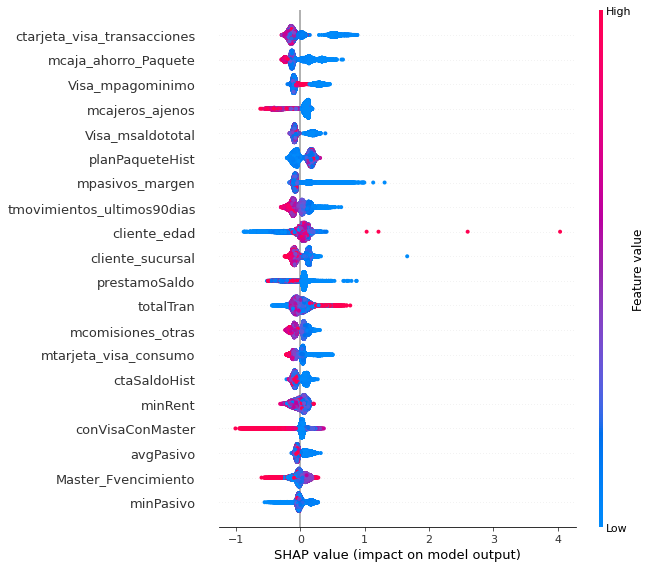

In [10]:
interpret_model(catboost)

In [11]:
df_junio = pd.read_csv('.\data_source\premium_abril.csv',sep="\t")
predictions = predict_model(catboost, data = df_junio)

In [12]:
result= predictions[['numero_de_cliente','clase_binaria', 'Label']]

In [13]:
result

,numero_de_cliente,clase_binaria,Label
0,6685522,NEG,0
1,6685723,NEG,0
2,6685739,NEG,0
3,6685748,NEG,0
4,6685836,NEG,0
...,...,...,...
193855,28682598,NEG,0
193856,28682614,NEG,0
193857,28682677,NEG,0
193858,28683302,NEG,0


In [18]:
df = pd.DataFrame(result)
df.to_csv('results_catboost.csv', index = False)

In [19]:
finalize_model(catboost)

In [20]:
save_model(catboost, 'catboost_churn_potential_clients')

Transformation Pipeline and Model Succesfully Saved
